In [1]:
import torch

weights = torch.randn(1).item()
bias = torch.randn(1).item()

X = torch.arange(0,10,0.1, dtype=torch.float32).unsqueeze(dim=1)
y = weights*X + bias

split = int(0.8*len(X))
X_train, y_train, X_test, y_test = X[:split],y[:split],X[split:],y[split:]

In [2]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(predictions, test_data, c='r', s=4, label="Predictions")
    plt.legend(prop={'size': 14})

In [3]:
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float32,
                                                requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float32,
                                             requires_grad=True))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [4]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [5]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001)

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_0.to(device)
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

In [7]:
epoch_count = []
train_loss_value = []
test_loss_value = []

epochs = 1000
for epoch in range(epochs):
    model_0.train()
    train_preds = model_0(X_train)
    train_loss = loss_fn(train_preds, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)
    
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")
    
    epoch_count.append(epoch)
    train_loss_value.append(train_loss)
    test_loss_value.append(test_loss)    

Epoch: 0 | Train Loss: 3.13731050491333 | Test Loss: 7.081624507904053
Epoch: 10 | Train Loss: 2.9717793464660645 | Test Loss: 6.718349456787109
Epoch: 20 | Train Loss: 2.806248188018799 | Test Loss: 6.355074405670166
Epoch: 30 | Train Loss: 2.640717029571533 | Test Loss: 5.991799831390381
Epoch: 40 | Train Loss: 2.4751856327056885 | Test Loss: 5.6285247802734375
Epoch: 50 | Train Loss: 2.3096542358398438 | Test Loss: 5.265249729156494
Epoch: 60 | Train Loss: 2.1446166038513184 | Test Loss: 4.902353763580322
Epoch: 70 | Train Loss: 1.9797642230987549 | Test Loss: 4.539553165435791
Epoch: 80 | Train Loss: 1.8149116039276123 | Test Loss: 4.176751613616943
Epoch: 90 | Train Loss: 1.6503479480743408 | Test Loss: 3.8142292499542236
Epoch: 100 | Train Loss: 1.486358642578125 | Test Loss: 3.4521260261535645
Epoch: 110 | Train Loss: 1.322583794593811 | Test Loss: 3.0902984142303467
Epoch: 120 | Train Loss: 1.1596416234970093 | Test Loss: 2.7291157245635986
Epoch: 130 | Train Loss: 0.9975684881

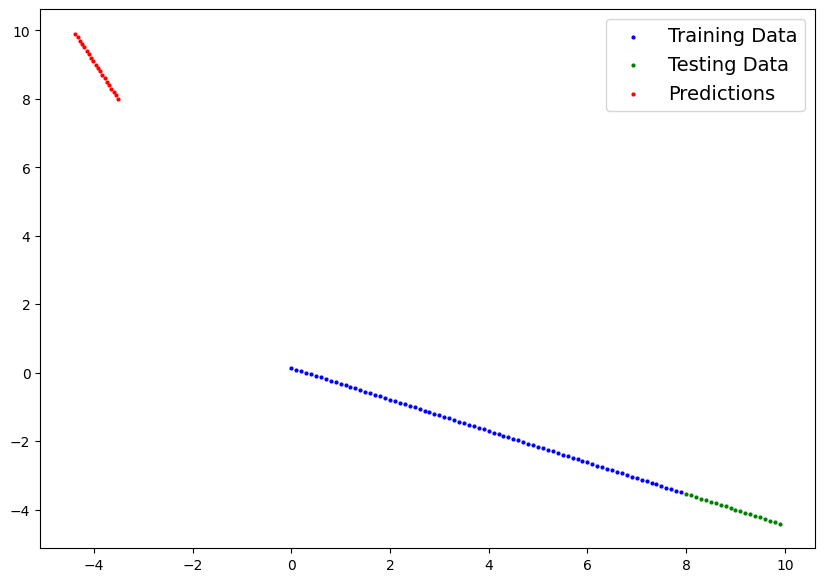

In [8]:
with torch.inference_mode():
    predictions = model_0(X_test)
plot_predictions(predictions=predictions)

In [9]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = '18-11-23_practice_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [10]:
load_saved_model = LinearRegressionModel()
load_saved_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [11]:
load_saved_model.to(device)

LinearRegressionModel()

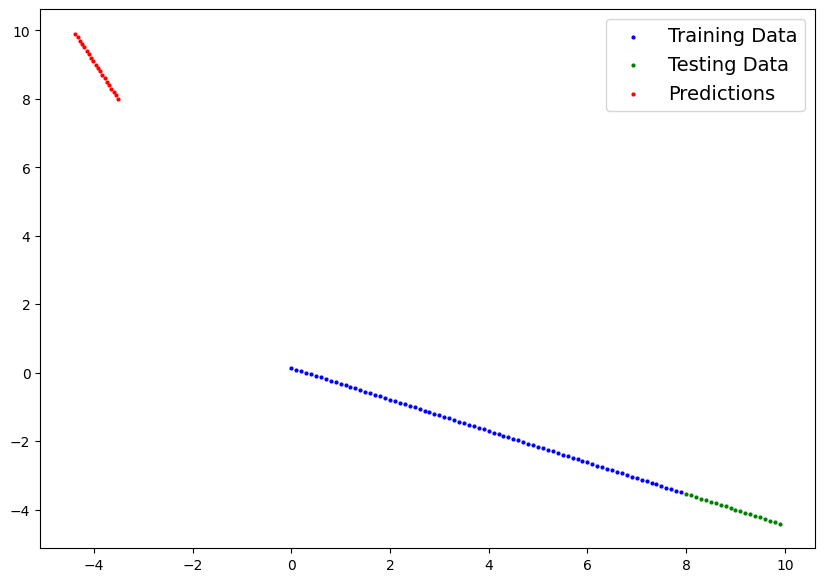

In [12]:
load_saved_model.eval()
with torch.inference_mode():
    loaded_predictions = load_saved_model(X_test)
plot_predictions(predictions=loaded_predictions)

In [13]:
loaded_predictions==predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

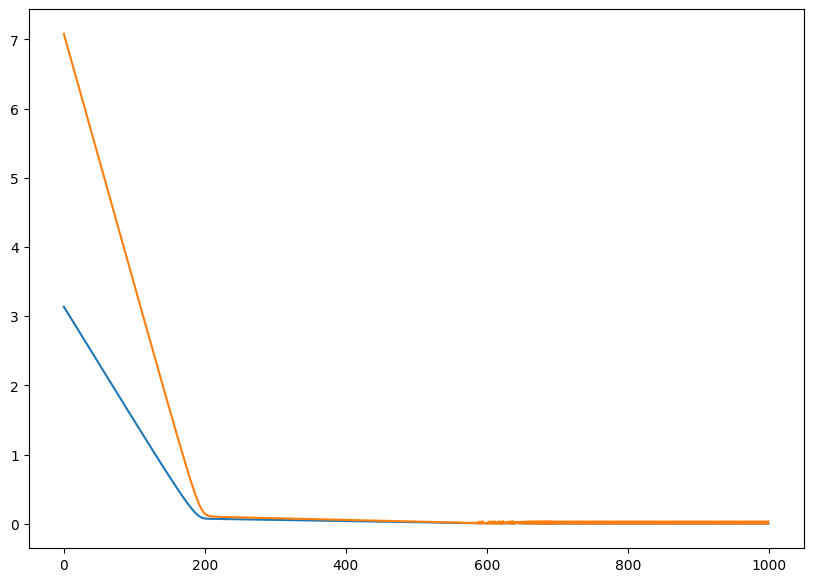

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
train_loss_values_np = torch.tensor(train_loss_value).cpu().numpy()
epoch_count_np = np.array(epoch_count)
epoch_count_np
plt.plot(epoch_count_np, train_loss_values_np, label="Training Loss")
plt.plot(epoch_count_np, test_loss_value, label="Test Loss")




In [15]:
import torch.nn as nn
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [16]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict(), list(model_1.parameters())

(OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 [Parameter containing:
  tensor([[0.7645]], requires_grad=True),
  Parameter containing:
  tensor([0.8300], requires_grad=True)])

In [17]:
loss_fn_v2 = nn.L1Loss()
optimizer_v2 = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [18]:
epoch_count_v2=[]
train_loss_values_v2=[]
test_loss_values_v2=[]
epochs_v2 = 1000
for epoch in range(epochs_v2):
    model_1.train()
    train_preds_v2 = model_1(X_train)
    train_loss_v2 = loss_fn_v2(train_preds_v2, y_train)
    optimizer_v2.zero_grad()
    train_loss_v2.backward()
    optimizer_v2.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_preds_v2 = model_1(X_test)
        test_loss_v2 = loss_fn_v2(test_preds_v2, y_test)
    
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss_v2} | Test Loss: {test_loss_v2}")
    
    epoch_count_v2.append(epoch)
    train_loss_values_v2.append(train_loss_v2)
    test_loss_values_v2.append(test_loss_v2)

Epoch: 0 | Train Loss: 5.528315544128418 | Test Loss: 11.612039566040039
Epoch: 10 | Train Loss: 5.362290859222412 | Test Loss: 11.248514175415039
Epoch: 20 | Train Loss: 5.196265697479248 | Test Loss: 10.884989738464355
Epoch: 30 | Train Loss: 5.030241012573242 | Test Loss: 10.521465301513672
Epoch: 40 | Train Loss: 4.864215850830078 | Test Loss: 10.157938957214355
Epoch: 50 | Train Loss: 4.6981916427612305 | Test Loss: 9.794414520263672
Epoch: 60 | Train Loss: 4.532166481018066 | Test Loss: 9.430890083312988
Epoch: 70 | Train Loss: 4.3661417961120605 | Test Loss: 9.067365646362305
Epoch: 80 | Train Loss: 4.2001166343688965 | Test Loss: 8.703840255737305
Epoch: 90 | Train Loss: 4.034091949462891 | Test Loss: 8.340315818786621
Epoch: 100 | Train Loss: 3.8680667877197266 | Test Loss: 7.976790428161621
Epoch: 110 | Train Loss: 3.7020421028137207 | Test Loss: 7.6132659912109375
Epoch: 120 | Train Loss: 3.536017656326294 | Test Loss: 7.2497406005859375
Epoch: 130 | Train Loss: 3.3699924945

Epoch: 210 | Train Loss: 2.0417933464050293 | Test Loss: 3.9780170917510986
Epoch: 220 | Train Loss: 1.8757686614990234 | Test Loss: 3.6144919395446777
Epoch: 230 | Train Loss: 1.7097437381744385 | Test Loss: 3.250967502593994
Epoch: 240 | Train Loss: 1.543718934059143 | Test Loss: 2.8874423503875732
Epoch: 250 | Train Loss: 1.377694010734558 | Test Loss: 2.5239174365997314
Epoch: 260 | Train Loss: 1.2116690874099731 | Test Loss: 2.1603925228118896
Epoch: 270 | Train Loss: 1.0456442832946777 | Test Loss: 1.7968677282333374
Epoch: 280 | Train Loss: 0.879619300365448 | Test Loss: 1.4333428144454956
Epoch: 290 | Train Loss: 0.7135944962501526 | Test Loss: 1.069818139076233
Epoch: 300 | Train Loss: 0.5475696325302124 | Test Loss: 0.7062931060791016
Epoch: 310 | Train Loss: 0.3815447688102722 | Test Loss: 0.3427683413028717
Epoch: 320 | Train Loss: 0.21551990509033203 | Test Loss: 0.026853859424591064
Epoch: 330 | Train Loss: 0.15405908226966858 | Test Loss: 0.18580865859985352
Epoch: 340 |

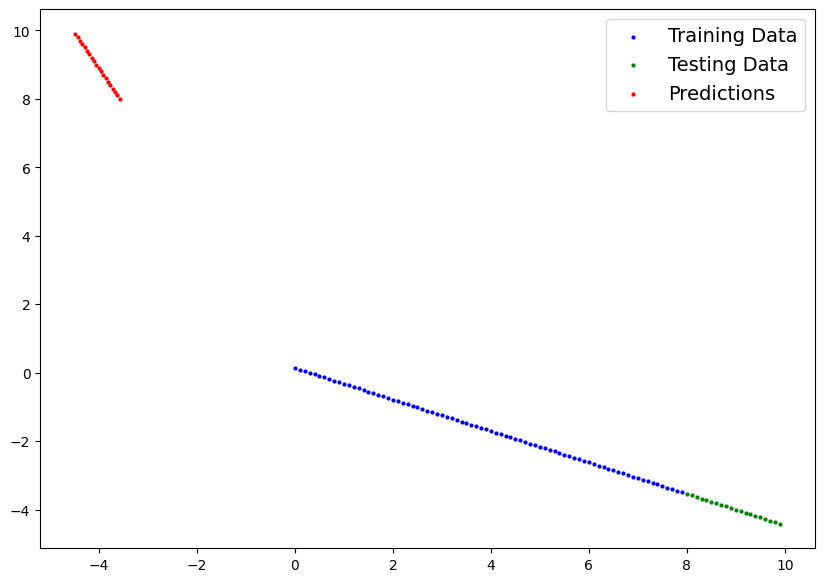

In [19]:
with torch.inference_mode():
    predictions_v2 = model_1(X_test)
plot_predictions(predictions=predictions_v2)